<a href="https://colab.research.google.com/github/HelamaBoeira/data-sience/blob/main/exercicio_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [100]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_treino = pd.read_csv("b_depressed.csv", encoding="utf-8")

In [106]:
dados_treino.shape
dados_treino.fillna(0)
dados_treino = dados_treino.replace(np.nan, 0)

In [107]:
dados_treino.head(20)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
5,483,25,1,35,1,6,10,8,35937466,736707,...,0,1,0,1,22688441,18907036,0,4442561,76629095.0,0
6,849,130,0,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
7,1386,72,1,21,1,2,10,4,12013633,20323505,...,0,0,1,0,9275569,36979933,0,33922659,54600174.0,0
8,930,195,1,32,1,7,9,9,11087568,25224208,...,1,0,0,0,32564587,28738691,1,14018381,15117619.0,0
9,390,33,1,29,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [114]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados, size=50):
    corr = dados.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

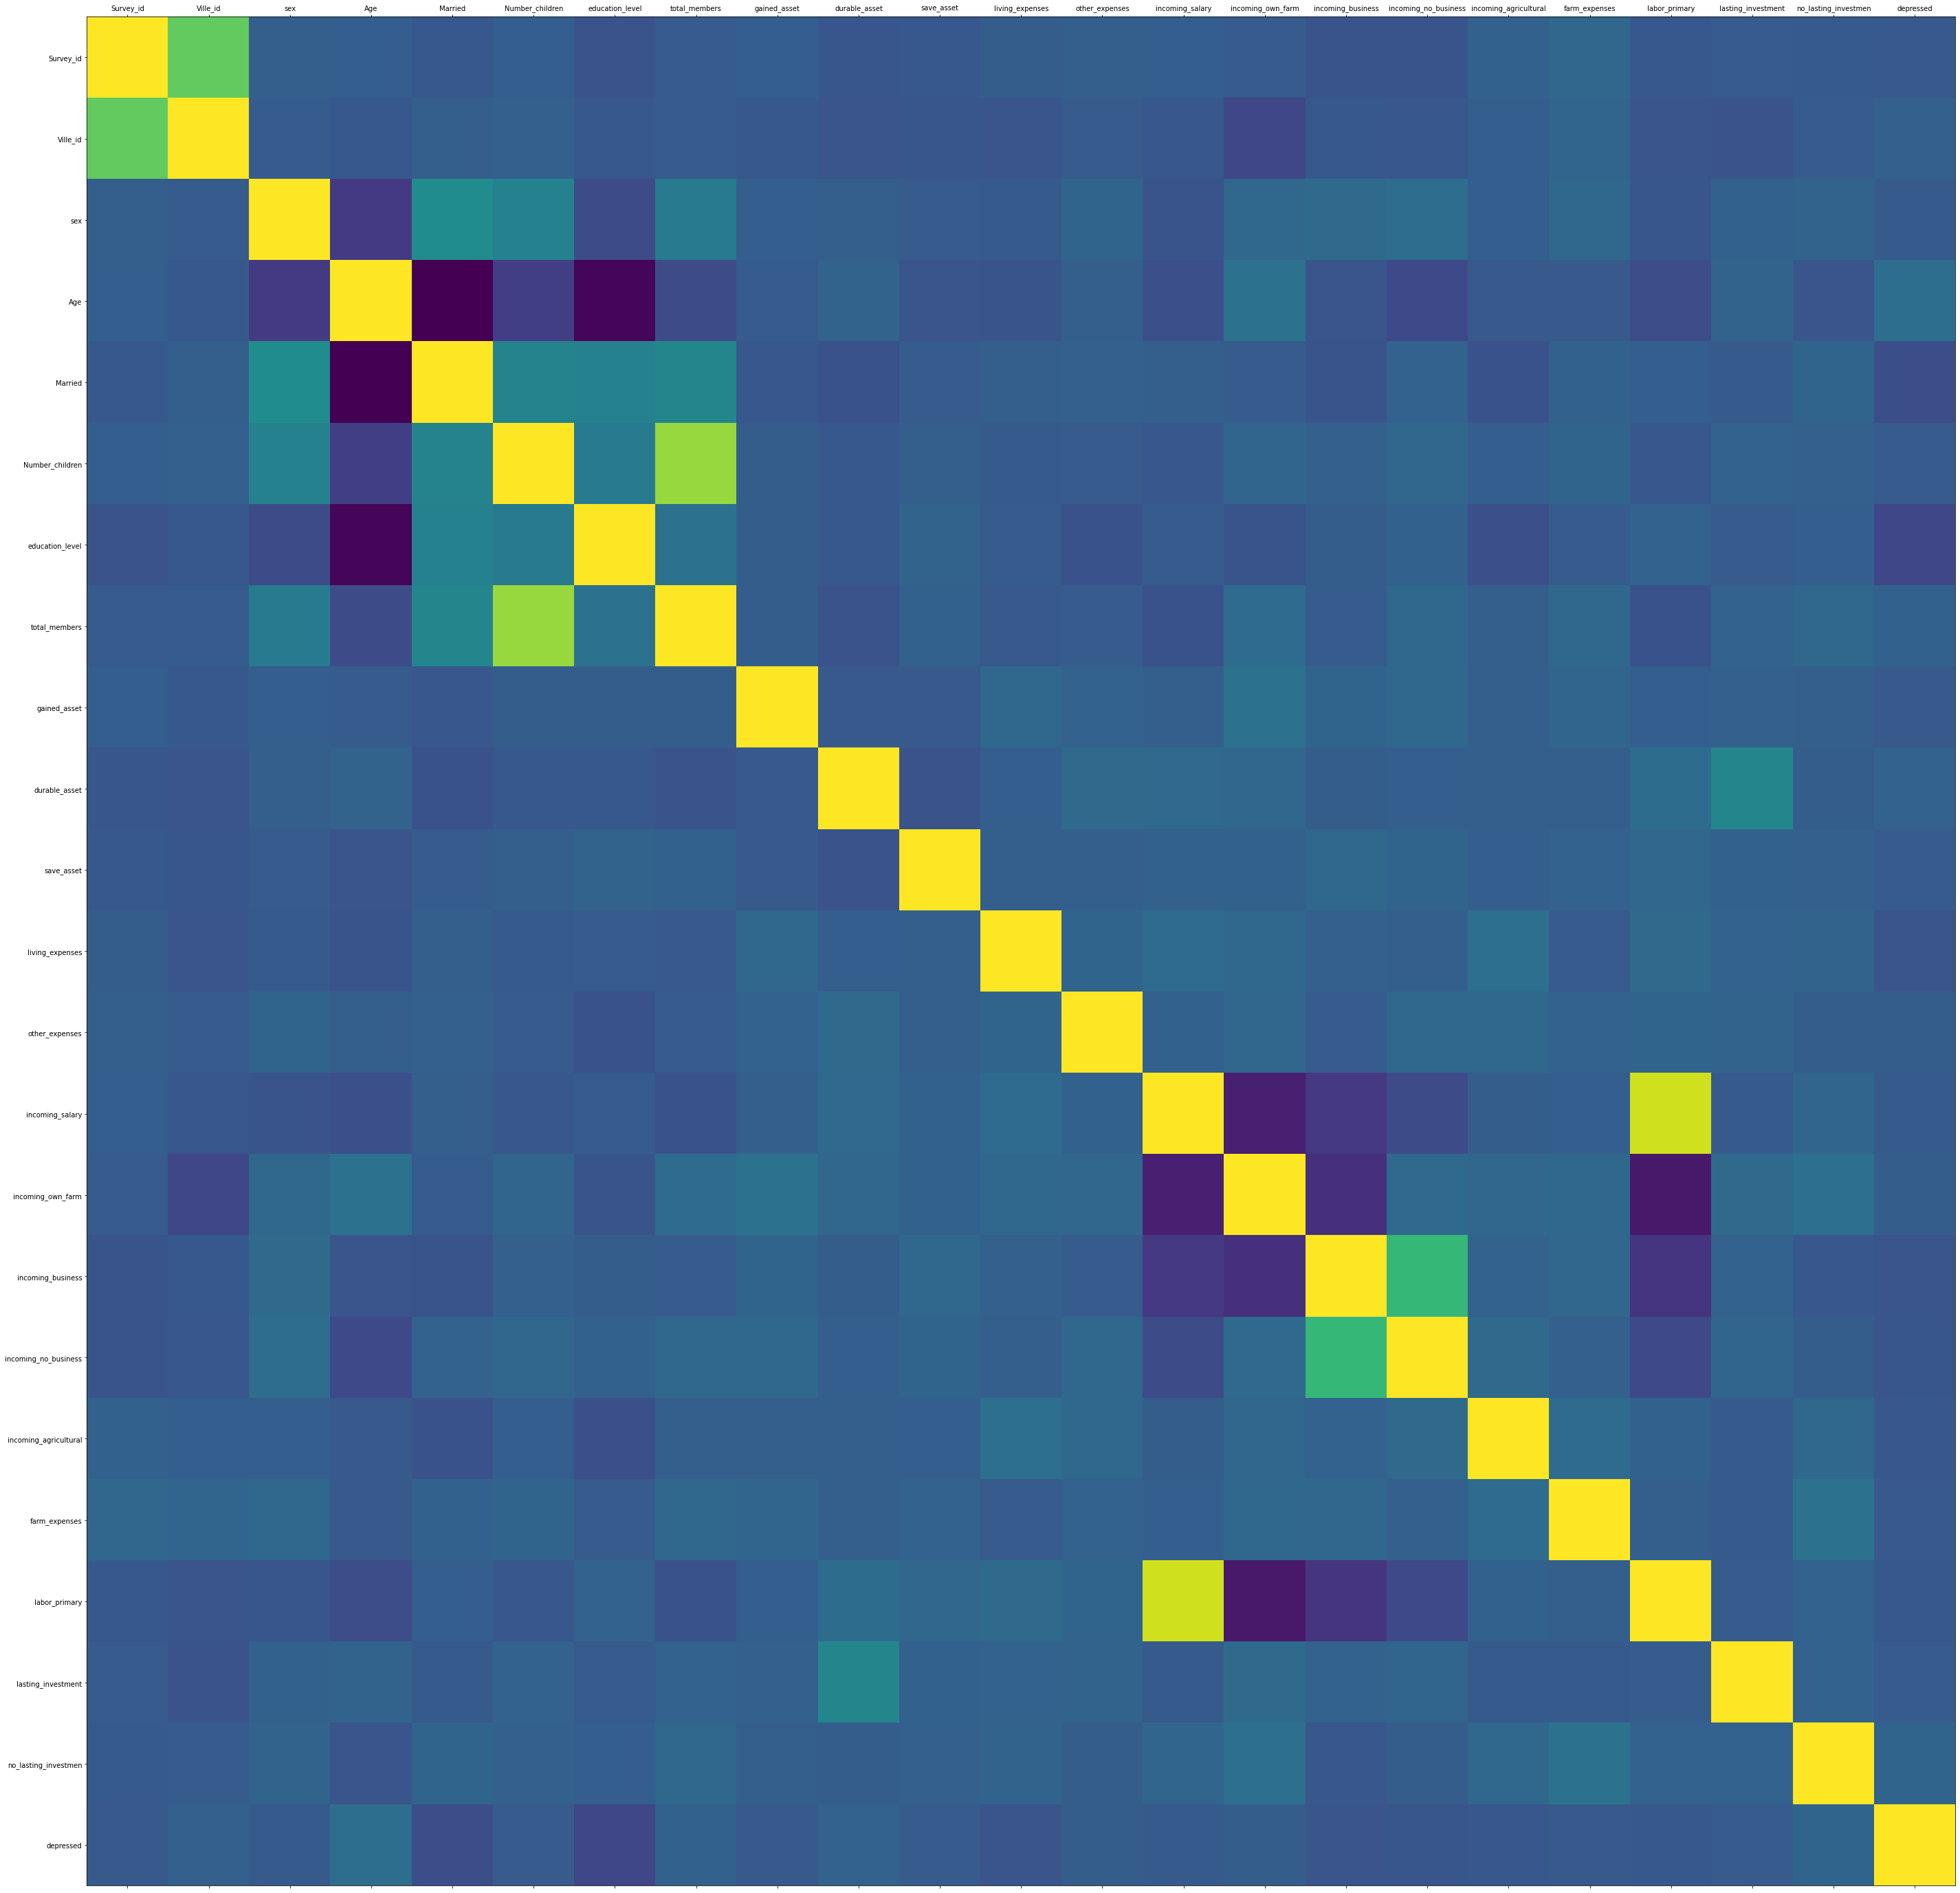

In [115]:
# Criando o gráfico
plot_corr(dados_treino)

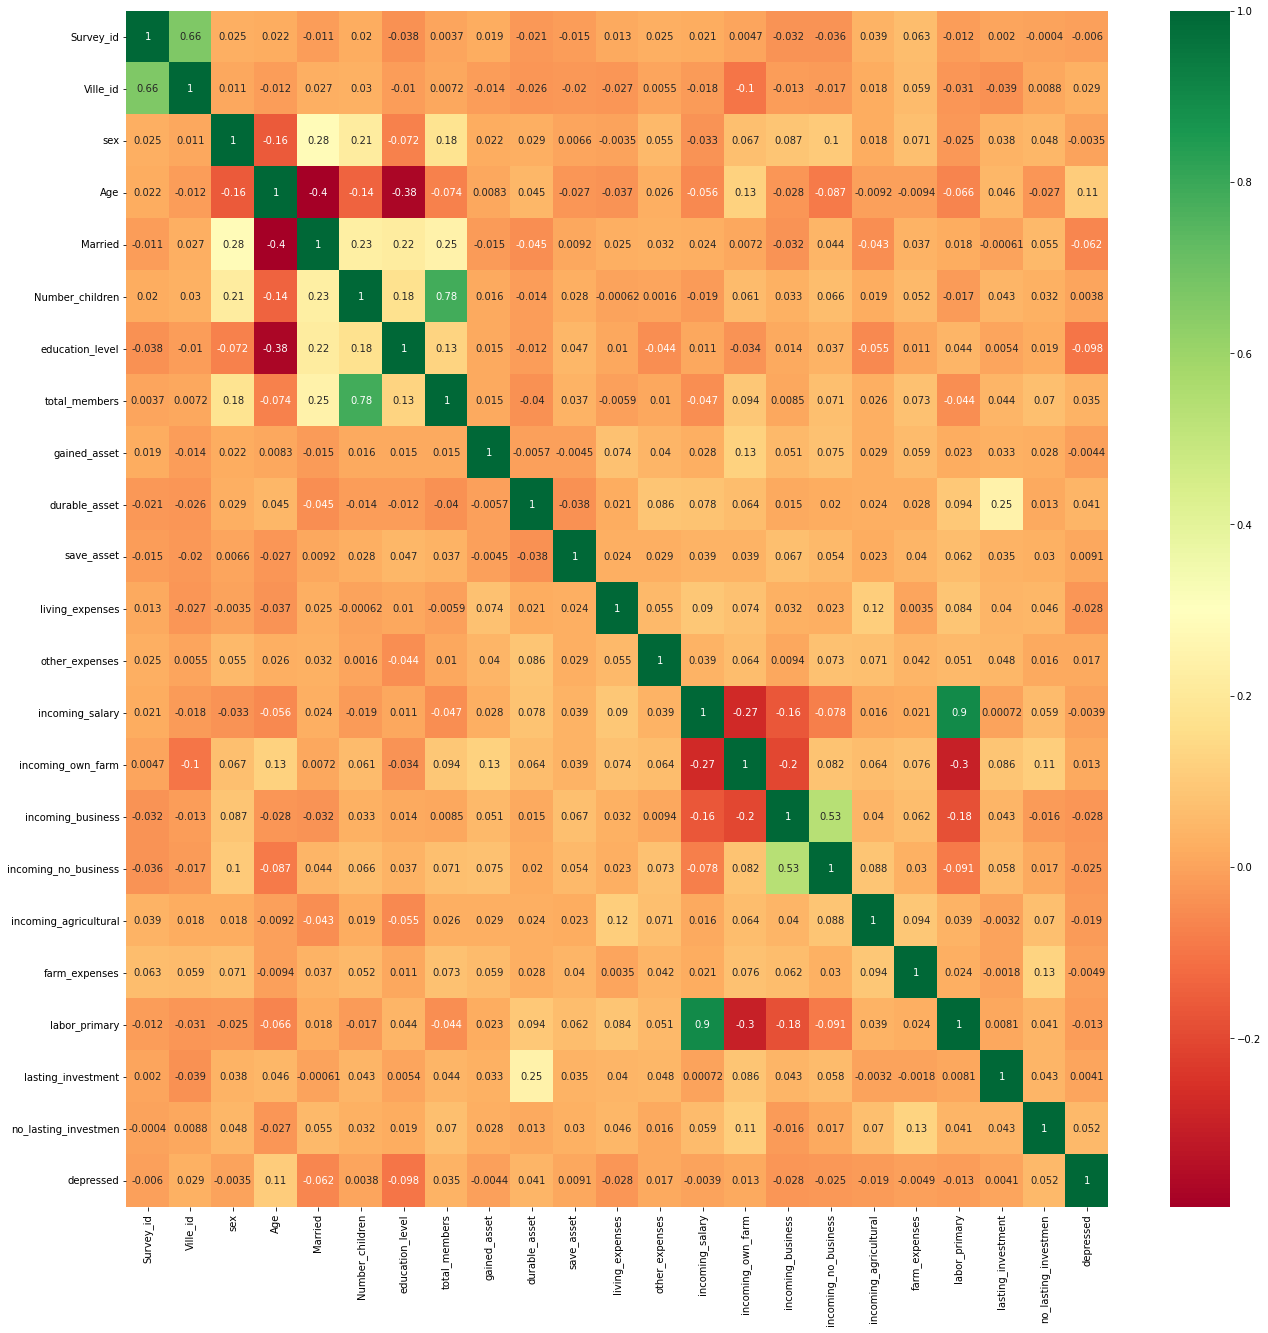

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

data = dados_treino
X = data.iloc[:,0:22]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [111]:
import pandas as pd
import numpy as np

data = dados_treino
X = data.iloc[:,0:22]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization




[0.10267971 0.10417146 0.01361448 0.1057343  0.01899507 0.07691663
 0.08662215 0.03839206 0.03694869 0.0449563  0.04121343 0.04265957
 0.04447449 0.01074223 0.01645657 0.00920882 0.0173605  0.04348873
 0.04389639 0.01231661 0.04311123 0.04604056]


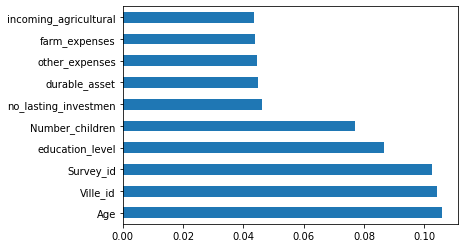

In [112]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [113]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = dados_treino

X = data.iloc[:,0:22]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

                    Specs         Score
21   no_lasting_investmen  5.488998e+07
9           durable_asset  2.842441e+07
11        living_expenses  1.545453e+07
17  incoming_agricultural  6.549786e+06
12         other_expenses  5.853370e+06
10             save_asset  1.346551e+06
18          farm_expenses  4.312706e+05
20     lasting_investment  3.332940e+05
8            gained_asset  3.303413e+05
3                     Age  8.977473e+01


In [116]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_treino[['no_lasting_investmen', 'durable_asset', 'living_expenses','incoming_agricultural', 'other_expenses']])
#Definição do atributo de classificacao
data_classif = np.array(dados_treino['depressed'])

In [117]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [89]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[6.36415567e+00 1.93506903e+02 2.29580100e+04]
 [8.11466543e+00 2.36493275e+02 2.66312129e+04]
 [           nan 1.63409819e+02 3.28655095e+04]
 ...
 [1.03919424e+01 2.62741770e+02 3.91166827e+04]
 [1.13017940e+01 7.74595861e+01 3.92276195e+04]
 [8.61865385e+00 2.57595883e+02 1.15953550e+04]]
Conjunto de Validacao
[[           nan 2.01827848e+02 3.54187350e+04]
 [7.48678088e+00 1.51202591e+02 3.11302126e+04]
 [9.80825818e+00 2.20049574e+02 3.41320680e+04]
 ...
 [6.58820797e+00 1.79699151e+02 3.52636124e+04]
 [7.87589514e+00 2.26284788e+02 1.27102495e+04]
 [           nan 2.40429787e+02 2.59596139e+04]]
-----------------------


In [118]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_treino.index)) * 100))

69.98% nos dados de treino
30.02% nos dados de teste


In [119]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [120]:
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.835
Na Base de Treinamento


In [121]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8298368298368298
na Base de Teste
